In [1]:
import humanize
import numpy as np
import pandas as pd
from datetime import datetime

%matplotlib inline

In [2]:
final_features = pd.read_csv('./final_features.csv', header=0, index_col=0)
outcomes = pd.read_csv('./labels.csv', header=None, index_col=0)

In [3]:
outcomes.shape

(313274, 1)

In [4]:
final_features.shape

(313274, 43)

In [5]:
final_features.iloc[:1]

,driver_age_raw,search_conducted,contraband_found,is_male,violation_cell_phone,violation_display_of_plates,violation_equipment,violation_incomplete_stop,violation_license,violation_lights,...,stop_duration_16-30 min,stop_duration_30+ min,day_period_Afternoon,day_period_Evening,day_period_Morning,day_period_Small Hours,season_Fall,season_Spring,season_Summer,season_Winter
0,0.69697,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [6]:
final_features.iloc[-1:]

,driver_age_raw,search_conducted,contraband_found,is_male,violation_cell_phone,violation_display_of_plates,violation_equipment,violation_incomplete_stop,violation_license,violation_lights,...,stop_duration_16-30 min,stop_duration_30+ min,day_period_Afternoon,day_period_Evening,day_period_Morning,day_period_Small Hours,season_Fall,season_Spring,season_Summer,season_Winter
318668,0.191919,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [7]:
outcomes.iloc[-1:]

,1
0,
318668,Ticket


In [8]:
outcomes

,1
0,
0,Ticket
1,Verbal Warning
2,Ticket
3,Written Warning
4,Ticket
5,Verbal Warning
6,Ticket
7,Verbal Warning
8,Ticket


In [9]:
final_features.head()

,driver_age_raw,search_conducted,contraband_found,is_male,violation_cell_phone,violation_display_of_plates,violation_equipment,violation_incomplete_stop,violation_license,violation_lights,...,stop_duration_16-30 min,stop_duration_30+ min,day_period_Afternoon,day_period_Evening,day_period_Morning,day_period_Small Hours,season_Fall,season_Spring,season_Summer,season_Winter
0,0.696970,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0.202020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0.343434,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0.464646,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0.303030,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [10]:
final_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313274 entries, 0 to 318668
Data columns (total 43 columns):
driver_age_raw                      313274 non-null float64
search_conducted                    313274 non-null int64
contraband_found                    313274 non-null int64
is_male                             313274 non-null int64
violation_cell_phone                313274 non-null int64
violation_display_of_plates         313274 non-null int64
violation_equipment                 313274 non-null int64
violation_incomplete_stop           313274 non-null int64
violation_license                   313274 non-null int64
violation_lights                    313274 non-null int64
violation_moving_violation          313274 non-null int64
violation_other                     313274 non-null int64
violation_registration              313274 non-null int64
violation_safe_movement             313274 non-null int64
violation_seatbelt                  313274 non-null int64
violation_speedin

# Data sanity check

In [11]:
description = final_features.describe()
description.iloc[:,:6]

,driver_age_raw,search_conducted,contraband_found,is_male,violation_cell_phone,violation_display_of_plates
count,313274.000000,313274.000000,313274.000000,313274.000000,313274.000000,313274.000000
mean,0.384508,0.016848,0.005771,0.663946,0.063890,0.018415
std,0.145742,0.128701,0.075750,0.472358,0.244557,0.134447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.262626,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.353535,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.494949,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
description.columns.values

array(['driver_age_raw', 'search_conducted', 'contraband_found', 'is_male',
       'violation_cell_phone', 'violation_display_of_plates',
       'violation_equipment', 'violation_incomplete_stop',
       'violation_license', 'violation_lights',
       'violation_moving_violation', 'violation_other',
       'violation_registration', 'violation_safe_movement',
       'violation_seatbelt', 'violation_speeding',
       'violation_suspended_license', 'violation_traffic_control_signal',
       'violation_window_tint', 'county_name_Fairfield County',
       'county_name_Hartford County', 'county_name_Litchfield County',
       'county_name_Middlesex County', 'county_name_New Haven County',
       'county_name_New London County', 'county_name_Tolland County',
       'county_name_Windham County', 'driver_race_Asian',
       'driver_race_Black', 'driver_race_Hispanic', 'driver_race_Other',
       'driver_race_White', 'stop_duration_1-15 min',
       'stop_duration_16-30 min', 'stop_duration_30+ 

In [13]:
description.iloc[:,6:12]

,violation_equipment,violation_incomplete_stop,violation_license,violation_lights,violation_moving_violation,violation_other
count,313274.000000,313274.000000,313274.000000,313274.000000,313274.000000,313274.000000
mean,0.009442,0.022673,0.009366,0.038647,0.089133,0.278989
std,0.096711,0.148860,0.096322,0.192752,0.284936,0.448503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
description.iloc[:,12:17]

,violation_registration,violation_safe_movement,violation_seatbelt,violation_speeding,violation_suspended_license
count,313274.000000,313274.000000,313274.000000,313274.000000,313274.000000
mean,0.119927,0.015989,0.038592,0.321147,0.009366
std,0.324877,0.125434,0.192622,0.466918,0.096322
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
description.iloc[:,17:22]

,violation_traffic_control_signal,violation_window_tint,county_name_Fairfield County,county_name_Hartford County,county_name_Litchfield County
count,313274.000000,313274.000000,313274.000000,313274.000000,313274.000000
mean,0.015989,0.007221,0.132118,0.125571,0.085551
std,0.125434,0.084666,0.338619,0.331365,0.279701
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
description.iloc[:,22:27]

,county_name_Middlesex County,county_name_New Haven County,county_name_New London County,county_name_Tolland County,county_name_Windham County
count,313274.000000,313274.000000,313274.000000,313274.000000,313274.000000
mean,0.117919,0.157689,0.146753,0.144331,0.090068
std,0.322513,0.364450,0.353860,0.351425,0.286280
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
description.iloc[:,27:33]

,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White,stop_duration_1-15 min
count,313274.000000,313274.000000,313274.000000,313274.000000,313274.000000,313274.000000
mean,0.018843,0.117724,0.098119,0.005510,0.759805,0.910886
std,0.135970,0.322282,0.297475,0.074022,0.427203,0.284908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
description.iloc[:,33:39]

,stop_duration_16-30 min,stop_duration_30+ min,day_period_Afternoon,day_period_Evening,day_period_Morning,day_period_Small Hours
count,313274.000000,313274.000000,313274.000000,313274.000000,313274.000000,313274.000000
mean,0.070635,0.018479,0.232799,0.196314,0.363155,0.207732
std,0.256214,0.134676,0.422616,0.397209,0.480910,0.405684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
description.iloc[:,39:43]

,season_Fall,season_Spring,season_Summer,season_Winter
count,313274.000000,313274.000000,313274.000000,313274.000000
mean,0.288217,0.263319,0.212137,0.236327
std,0.452934,0.440435,0.408822,0.424826
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


# Shuffle and split data

In [20]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_features, 
                                                    outcomes, 
                                                    test_size=0.2, 
                                                    random_state=0)


D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Naive predictor

In [44]:
outcomes.count().values[0]

313274

In [36]:
np.unique(outcomes, return_counts=True)

(array(['Arrest', 'Summons', 'Ticket', 'Verbal Warning', 'Written Warning'], dtype=object),
 array([  7303,  12203, 218951,  47750,  27067], dtype=int64))

In [49]:
np.unique(outcomes, return_counts=True)[1].max()


218951

In [51]:
# Most frequent outcome, 'Ticket,' count
tp = np.unique(outcomes, return_counts=True)[1].max()
total_outcomes = outcomes.count().values[0]
fp = total_outcomes - tp
tn = 0
fn = 0

accuracy = float(tp) / total_outcomes
recall = float(tp) / (tp + fn)
precision = float(tp) / (tp + fp)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.6989, F-score: 0.7437]


## Simple Linear Classifier

In [53]:
from sklearn import linear_model

clf_sgd = linear_model.SGDClassifier()
clf_sgd.fit(X_train, y_train)
clf_sgd.score(X_test, y_test)

D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.71925624451360626

## VotingClassifier

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [65]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier(random_state=0)
clf5 = GradientBoostingClassifier(random_state=0)

eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3), ('dt', clf4), ('gb', clf5)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
print('eclf1 score: {}'.format(eclf1.score(X_test, y_test)))

eclf2 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3), ('dt', clf4), ('gb', clf5)],
        voting='soft')
eclf2 = eclf2.fit(X_train, y_train)
print('eclf2 score: {}'.format(eclf2.score(X_test, y_test)))

eclf3 = VotingClassifier(estimators=[
       ('lr', clf1), ('rf', clf2), ('gnb', clf3), ('dt', clf4), ('gb', clf5)],
       voting='soft', weights=[1,1,1,1,1])
eclf3 = eclf3.fit(X_train, y_train)
print('eclf3 score: {}'.format(eclf3.score(X_test, y_test)))

D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\preprocessing\label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\preprocessing\label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


eclf1 score: 0.7188253132232064


D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\preprocessing\label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\preprocessing\label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


eclf2 score: 0.7072859308913894


D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\preprocessing\label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\preprocessing\label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


eclf3 score: 0.7072859308913894


In [66]:
print(eclf3.transform(X_train).shape)

(5, 250619, 5)


## Finding Donors Test

In [67]:
from sklearn.metrics import fbeta_score, accuracy_score


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, 0.5, average='weighted')
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5, average='weighted')
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    # Return the results
    return results


In [93]:
from time import time

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display # Allows the use of display() for DataFrames

import visuals as vs

%matplotlib inline


# TODO: Initialize the three models
clf_A = SVC()
clf_B = KNeighborsClassifier()
clf_C = AdaBoostClassifier(random_state=0)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(X_train)
samples_10 = int(samples_100 * 0.1)
samples_1 = int(samples_100 * 0.01)

# Collect results on the learners
# samples = [samples_1, samples_10, samples_100]
samples = [samples_1, samples_10]
results = {}
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier(random_state=0)
clf5 = GradientBoostingClassifier(random_state=0)

# for clf in [clf_A, clf_B, clf_C]:
for clf in [clf1, clf2, clf3, clf4, clf5, clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# vs.evaluate(results, accuracy, fscore)
# vs.evaluate(results, fscore)


D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression trained on 2506 samples.
LogisticRegression trained on 25061 samples.


D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\ipykernel\__main__.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier trained on 2506 samples.


D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\ipykernel\__main__.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier trained on 25061 samples.


D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


GaussianNB trained on 2506 samples.
GaussianNB trained on 25061 samples.
DecisionTreeClassifier trained on 2506 samples.
DecisionTreeClassifier trained on 25061 samples.
GradientBoostingClassifier trained on 2506 samples.
GradientBoostingClassifier trained on 25061 samples.
SVC trained on 2506 samples.
SVC trained on 25061 samples.


D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\ipykernel\__main__.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier trained on 2506 samples.
KNeighborsClassifier trained on 25061 samples.


D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier trained on 2506 samples.
AdaBoostClassifier trained on 25061 samples.


In [94]:
results

{'AdaBoostClassifier': {0: {'acc_test': 0.6880376665868646,
   'acc_train': 0.73333333333333328,
   'f_test': 0.62455695148950785,
   'f_train': 0.66977829504145292,
   'pred_time': 0.539433479309082,
   'train_time': 0.1734616756439209},
  1: {'acc_test': 0.71975101747665793,
   'acc_train': 0.74333333333333329,
   'f_test': 0.63570748390991283,
   'f_train': 0.653961069541102,
   'pred_time': 0.5464534759521484,
   'train_time': 1.5140256881713867}},
 'DecisionTreeClassifier': {0: {'acc_test': 0.57082435559811662,
   'acc_train': 0.99333333333333329,
   'f_test': 0.58583779620178067,
   'f_train': 0.99331663630843958,
   'pred_time': 0.02102804183959961,
   'train_time': 0.011029243469238281},
  1: {'acc_test': 0.59725480807597164,
   'acc_train': 0.94666666666666666,
   'f_test': 0.5961071139937264,
   'f_train': 0.94618066761588349,
   'pred_time': 0.025066852569580078,
   'train_time': 0.12533354759216309}},
 'GaussianNB': {0: {'acc_test': 0.10259356795148034,
   'acc_train': 0.08

In [95]:
algos_perf_100 = {
    'AdaBoostClassifier': {
        0: {
            'acc_test': 0.72201739685579758,
            'acc_train': 0.75666666666666671,
            'f_test': 0.6347034296654146,
            'f_train': 0.67410907596277725,
            'pred_time': 0.543445348739624,
            'train_time': 19.627169847488403
        }
    },
    'DecisionTreeClassifier': {
        0: {
            'acc_test': 0.64998802968637781,
            'acc_train': 0.87666666666666671,
            'f_test': 0.61633367656940052,
            'f_train': 0.86302242865468659,
            'pred_time': 0.03910422325134277,
            'train_time': 1.6804695129394531
        }
    },
    'GaussianNB': {
        0: {
            'acc_test': 0.6477695315617269,
            'acc_train': 0.65000000000000002,
            'f_test': 0.64894363195314964,
            'f_train': 0.6660681002181974,
            'pred_time': 0.1474158763885498,
            'train_time': 0.4652097225189209
        }
    },
    'GradientBoostingClassifier': {
        0: {
            'acc_test': 0.72653419519591411,
            'acc_train': 0.75666666666666671,
            'f_test': 0.64379215256892308,
            'f_train': 0.69227822649893855,
            'pred_time': 0.4522271156311035,
            'train_time': 134.945702791214
        }
    },
    'KNeighborsClassifier': {
        0: {
            'acc_test': 0.70182746787965844,
            'acc_train': 0.76333333333333331,
            'f_test': 0.63953157257657978,
            'f_train': 0.72221990752796439,
            'pred_time': 469.2406713962555,
            'train_time': 105.75855588912964
        }
    },
    'LogisticRegression': {
        0: {
            'acc_test': 0.72195355518314575,
            'acc_train': 0.74333333333333329,
            'f_test': 0.63036907824787092,
            'f_train': 0.65587459707390683,
            'pred_time': 0.015039205551147461,
            'train_time': 7.507376670837402
        }
    },
    'RandomForestClassifier': {
        0: {
            'acc_test': 0.66138376825472822,
            'acc_train': 0.85666666666666669,
            'f_test': 0.62684278836520912,
            'f_train': 0.84386648286820054,
            'pred_time': 0.2316434383392334,
            'train_time': 3.1453657150268555
        }
    },
    'SVC': {
        0: {
            'acc_test': 0.72153858431090889,
            'acc_train': 0.74333333333333329,
            'f_test': 0.62665356067781552,
            'f_train': 0.66433167343078081,
            'pred_time': 415.1082410812378,
            'train_time': 12675.905246019363
        }
    }
}

In [96]:
algos_perf_1_10 = {
    'AdaBoostClassifier': {
        0: {
            'acc_test': 0.6880376665868646,
            'acc_train': 0.73333333333333328,
            'f_test': 0.62455695148950785,
            'f_train': 0.66977829504145292,
            'pred_time': 0.539433479309082,
            'train_time': 0.1734616756439209
        },
        1: {
            'acc_test': 0.71975101747665793,
            'acc_train': 0.74333333333333329,
            'f_test': 0.63570748390991283,
            'f_train': 0.653961069541102,
            'pred_time': 0.5464534759521484,
            'train_time': 1.5140256881713867
        }
    },
    'DecisionTreeClassifier': {
        0: {
            'acc_test': 0.57082435559811662,
            'acc_train': 0.99333333333333329,
            'f_test': 0.58583779620178067,
            'f_train': 0.99331663630843958,
            'pred_time': 0.02102804183959961,
            'train_time': 0.011029243469238281
        },
        1: {
            'acc_test': 0.59725480807597164,
            'acc_train': 0.94666666666666666,
            'f_test': 0.5961071139937264,
            'f_train': 0.94618066761588349,
            'pred_time': 0.025066852569580078,
            'train_time': 0.12533354759216309
        }
    },
    'GaussianNB': {
        0: {
            'acc_test': 0.10259356795148034,
            'acc_train': 0.083333333333333329,
            'f_test': 0.028189924174105794,
            'f_train': 0.029534142118342974,
            'pred_time': 0.1323244571685791,
            'train_time': 0.004010677337646484
        },
        1: {
            'acc_test': 0.12931130795626847,
            'acc_train': 0.12,
            'f_test': 0.12916640033819876,
            'f_train': 0.15739017372272129,
            'pred_time': 0.13032174110412598,
            'train_time': 0.03910064697265625
        }
    },
    'GradientBoostingClassifier': {
        0: {
            'acc_test': 0.71092490623254334,
            'acc_train': 0.81000000000000005,
            'f_test': 0.63530485219905097,
            'f_train': 0.78236498150146749,
            'pred_time': 0.43916845321655273,
            'train_time': 1.0352869033813477
        },
        1: {
            'acc_test': 0.72490623254329267,
            'acc_train': 0.76000000000000001,
            'f_test': 0.64347985483372394,
            'f_train': 0.69558556782166092,
            'pred_time': 0.4291689395904541,
            'train_time': 9.850817203521729
        }
    },
    'KNeighborsClassifier': {
        0: {
            'acc_test': 0.6886920437315458,
            'acc_train': 0.77333333333333332,
            'f_test': 0.59287183310418978,
            'f_train': 0.72444177427265255,
            'pred_time': 7.581151485443115,
            'train_time': 0.010005712509155273
        },
        1: {
            'acc_test': 0.69636900486792752,
            'acc_train': 0.78333333333333333,
            'f_test': 0.62128133889347992,
            'f_train': 0.74183674775562447,
            'pred_time': 70.91268134117126,
            'train_time': 0.4231266975402832
        }
    },
    'LogisticRegression': {
        0: {
            'acc_test': 0.71764424227914769,
            'acc_train': 0.75,
            'f_test': 0.61911581672791882,
            'f_train': 0.67090722679839265,
            'pred_time': 0.04411673545837402,
            'train_time': 0.03409004211425781
        },
        1: {
            'acc_test': 0.72155454472907188,
            'acc_train': 0.73666666666666669,
            'f_test': 0.62967738703888954,
            'f_train': 0.64343872533090696,
            'pred_time': 0.015011787414550781,
            'train_time': 0.3048381805419922
        }
    },
    'RandomForestClassifier': {
        0: {
            'acc_test': 0.66649110206687412,
            'acc_train': 0.97666666666666668,
            'f_test': 0.61185444064698324,
            'f_train': 0.97659659659659648,
            'pred_time': 0.10327458381652832,
            'train_time': 0.02907705307006836
        },
        1: {
            'acc_test': 0.65265341951959144,
            'acc_train': 0.93000000000000005,
            'f_test': 0.61806534585982587,
            'f_train': 0.9292351914609287,
            'pred_time': 0.14137554168701172,
            'train_time': 0.21961092948913574
        }
    },
    'SVC': {
        0: {
            'acc_test': 0.70449285771287207,
            'acc_train': 0.73333333333333328,
            'f_test': 0.53983227104940101,
            'f_train': 0.5848263320603746,
            'pred_time': 4.238268613815308,
            'train_time': 0.30383753776550293
        },
        1: {
            'acc_test': 0.71711754847977016,
            'acc_train': 0.74333333333333329,
            'f_test': 0.61122570948237986,
            'f_train': 0.64742204388133662,
            'pred_time': 41.337204933166504,
            'train_time': 34.030903577804565
        }
    }
}

In [97]:
algos_perf = {
    'AdaBoostClassifier': {
        0: {
            'acc_test': 0.6880376665868646,
            'acc_train': 0.73333333333333328,
            'f_test': 0.62455695148950785,
            'f_train': 0.66977829504145292,
            'pred_time': 0.539433479309082,
            'train_time': 0.1734616756439209
        },
        1: {
            'acc_test': 0.71975101747665793,
            'acc_train': 0.74333333333333329,
            'f_test': 0.63570748390991283,
            'f_train': 0.653961069541102,
            'pred_time': 0.5464534759521484,
            'train_time': 1.5140256881713867
        },
        2: {
            'acc_test': 0.72201739685579758,
            'acc_train': 0.75666666666666671,
            'f_test': 0.6347034296654146,
            'f_train': 0.67410907596277725,
            'pred_time': 0.543445348739624,
            'train_time': 19.627169847488403
        }

    },
    'DecisionTreeClassifier': {
        0: {
            'acc_test': 0.57082435559811662,
            'acc_train': 0.99333333333333329,
            'f_test': 0.58583779620178067,
            'f_train': 0.99331663630843958,
            'pred_time': 0.02102804183959961,
            'train_time': 0.011029243469238281
        },
        1: {
            'acc_test': 0.59725480807597164,
            'acc_train': 0.94666666666666666,
            'f_test': 0.5961071139937264,
            'f_train': 0.94618066761588349,
            'pred_time': 0.025066852569580078,
            'train_time': 0.12533354759216309
        },
        2: {
            'acc_test': 0.64998802968637781,
            'acc_train': 0.87666666666666671,
            'f_test': 0.61633367656940052,
            'f_train': 0.86302242865468659,
            'pred_time': 0.03910422325134277,
            'train_time': 1.6804695129394531
        }

    },
    'GaussianNB': {
        0: {
            'acc_test': 0.10259356795148034,
            'acc_train': 0.083333333333333329,
            'f_test': 0.028189924174105794,
            'f_train': 0.029534142118342974,
            'pred_time': 0.1323244571685791,
            'train_time': 0.004010677337646484
        },
        1: {
            'acc_test': 0.12931130795626847,
            'acc_train': 0.12,
            'f_test': 0.12916640033819876,
            'f_train': 0.15739017372272129,
            'pred_time': 0.13032174110412598,
            'train_time': 0.03910064697265625
        },
        2: {
            'acc_test': 0.6477695315617269,
            'acc_train': 0.65000000000000002,
            'f_test': 0.64894363195314964,
            'f_train': 0.6660681002181974,
            'pred_time': 0.1474158763885498,
            'train_time': 0.4652097225189209
        }

    },
    'GradientBoostingClassifier': {
        0: {
            'acc_test': 0.71092490623254334,
            'acc_train': 0.81000000000000005,
            'f_test': 0.63530485219905097,
            'f_train': 0.78236498150146749,
            'pred_time': 0.43916845321655273,
            'train_time': 1.0352869033813477
        },
        1: {
            'acc_test': 0.72490623254329267,
            'acc_train': 0.76000000000000001,
            'f_test': 0.64347985483372394,
            'f_train': 0.69558556782166092,
            'pred_time': 0.4291689395904541,
            'train_time': 9.850817203521729
        },
        2: {
            'acc_test': 0.72653419519591411,
            'acc_train': 0.75666666666666671,
            'f_test': 0.64379215256892308,
            'f_train': 0.69227822649893855,
            'pred_time': 0.4522271156311035,
            'train_time': 134.945702791214
        }
    },
    'KNeighborsClassifier': {
        0: {
            'acc_test': 0.6886920437315458,
            'acc_train': 0.77333333333333332,
            'f_test': 0.59287183310418978,
            'f_train': 0.72444177427265255,
            'pred_time': 7.581151485443115,
            'train_time': 0.010005712509155273
        },
        1: {
            'acc_test': 0.69636900486792752,
            'acc_train': 0.78333333333333333,
            'f_test': 0.62128133889347992,
            'f_train': 0.74183674775562447,
            'pred_time': 70.91268134117126,
            'train_time': 0.4231266975402832
        },
        2: {
            'acc_test': 0.70182746787965844,
            'acc_train': 0.76333333333333331,
            'f_test': 0.63953157257657978,
            'f_train': 0.72221990752796439,
            'pred_time': 469.2406713962555,
            'train_time': 105.75855588912964
        }
    },
    'LogisticRegression': {
        0: {
            'acc_test': 0.71764424227914769,
            'acc_train': 0.75,
            'f_test': 0.61911581672791882,
            'f_train': 0.67090722679839265,
            'pred_time': 0.04411673545837402,
            'train_time': 0.03409004211425781
        },
        1: {
            'acc_test': 0.72155454472907188,
            'acc_train': 0.73666666666666669,
            'f_test': 0.62967738703888954,
            'f_train': 0.64343872533090696,
            'pred_time': 0.015011787414550781,
            'train_time': 0.3048381805419922
        },
        2: {
            'acc_test': 0.72195355518314575,
            'acc_train': 0.74333333333333329,
            'f_test': 0.63036907824787092,
            'f_train': 0.65587459707390683,
            'pred_time': 0.015039205551147461,
            'train_time': 7.507376670837402
        }
    },
    'RandomForestClassifier': {
        0: {
            'acc_test': 0.66649110206687412,
            'acc_train': 0.97666666666666668,
            'f_test': 0.61185444064698324,
            'f_train': 0.97659659659659648,
            'pred_time': 0.10327458381652832,
            'train_time': 0.02907705307006836
        },
        1: {
            'acc_test': 0.65265341951959144,
            'acc_train': 0.93000000000000005,
            'f_test': 0.61806534585982587,
            'f_train': 0.9292351914609287,
            'pred_time': 0.14137554168701172,
            'train_time': 0.21961092948913574
        },
        2: {
            'acc_test': 0.66138376825472822,
            'acc_train': 0.85666666666666669,
            'f_test': 0.62684278836520912,
            'f_train': 0.84386648286820054,
            'pred_time': 0.2316434383392334,
            'train_time': 3.1453657150268555
        }
    },
    'SVC': {
        0: {
            'acc_test': 0.70449285771287207,
            'acc_train': 0.73333333333333328,
            'f_test': 0.53983227104940101,
            'f_train': 0.5848263320603746,
            'pred_time': 4.238268613815308,
            'train_time': 0.30383753776550293
        },
        1: {
            'acc_test': 0.71711754847977016,
            'acc_train': 0.74333333333333329,
            'f_test': 0.61122570948237986,
            'f_train': 0.64742204388133662,
            'pred_time': 41.337204933166504,
            'train_time': 34.030903577804565
        },
        2: {
            'acc_test': 0.72153858431090889,
            'acc_train': 0.74333333333333329,
            'f_test': 0.62665356067781552,
            'f_train': 0.66433167343078081,
            'pred_time': 415.1082410812378,
            'train_time': 12675.905246019363
        }
    }
}

In [ ]:
import visuals as vs

results = algos_perf
# vs.evaluate(results, accuracy, fscore)
vs.evaluate(results, fscore)


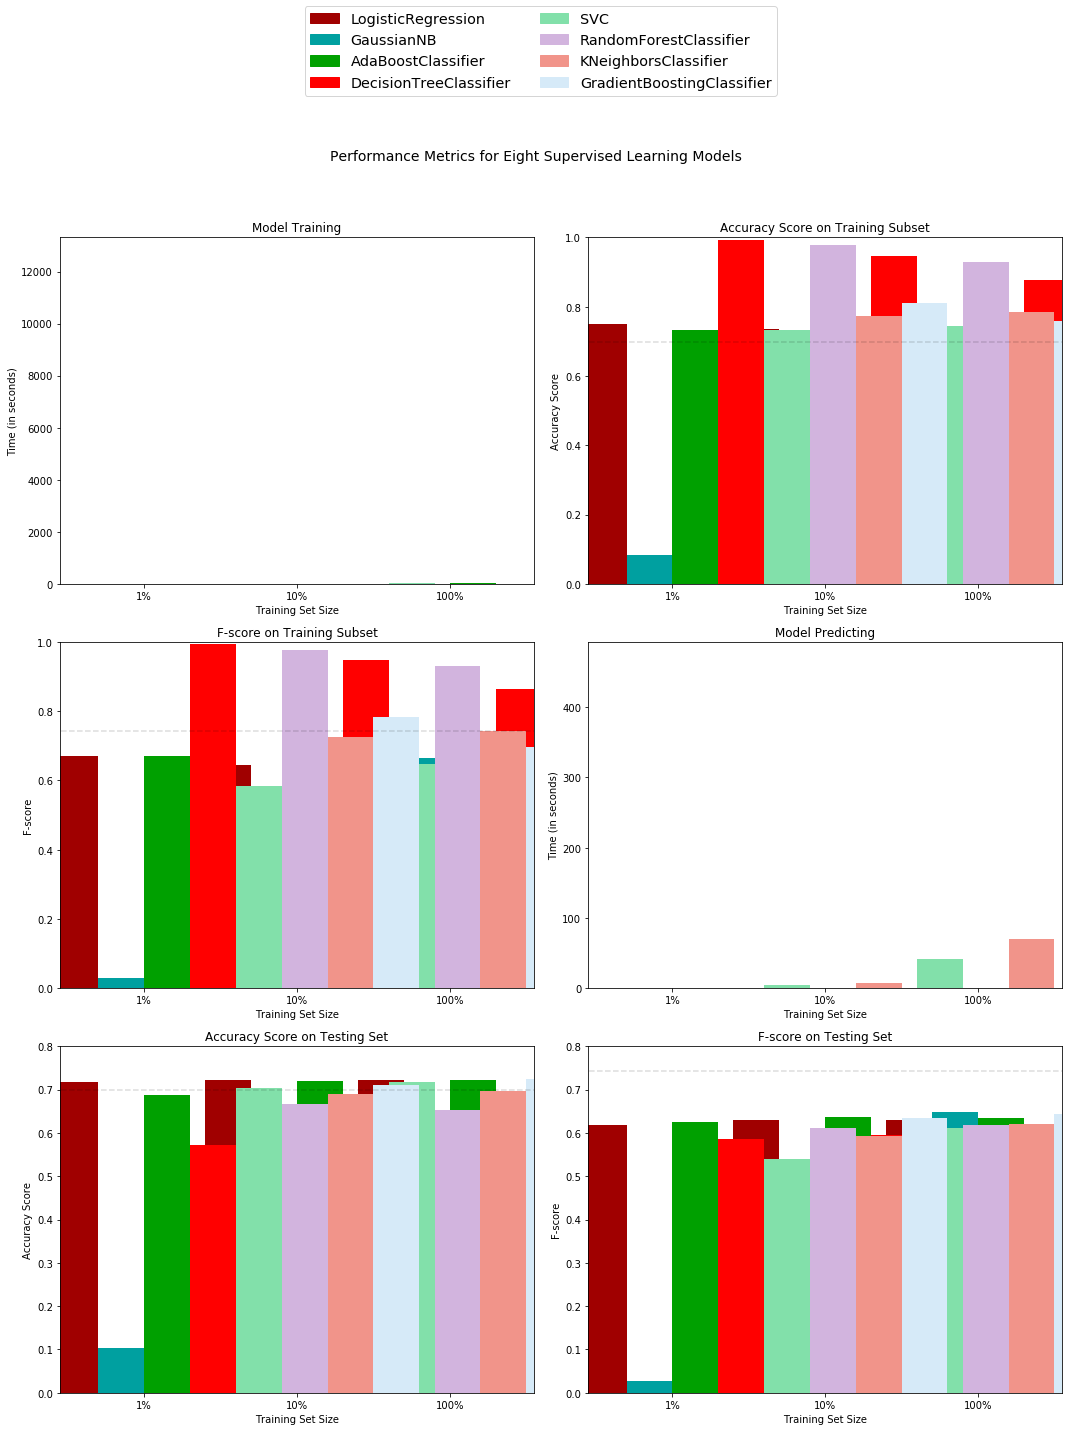

In [137]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score


def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
#     fig, ax = pl.subplots(2, 3, figsize = (15,17))
    fig, ax = pl.subplots(3, 2, figsize = (15,17))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000', '#FF0000', '#82E0AA', '#D2B4DE', '#F1948A', '#D6EAF8']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//2, j%2].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//2, j%2].set_xticks([0.45, 1.45, 2.45])
                ax[j//2, j%2].set_xticklabels(["1%", "10%", "100%"])
                ax[j//2, j%2].set_xlabel("Training Set Size")
                ax[j//2, j%2].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[1, 0].set_ylabel("F-score")
    ax[1, 1].set_ylabel("Time (in seconds)")
    ax[2, 0].set_ylabel("Accuracy Score")
    ax[2, 1].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[1, 0].set_title("F-score on Training Subset")
    ax[1, 1].set_title("Model Predicting")
    ax[2, 0].set_title("Accuracy Score on Testing Set")
    ax[2, 1].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = .2, color = 'k', linestyle = 'dashed')
    ax[2, 0].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = .2, color = 'k', linestyle = 'dashed')
    ax[1, 0].axhline(y = f1, xmin = -0.1, xmax = 8.0, linewidth = .2, color = 'k', linestyle = 'dashed')
    ax[2, 1].axhline(y = f1, xmin = -0.1, xmax = 8.0, linewidth = .2, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[1, 0].set_ylim((0, 1))
    ax[2, 0].set_ylim((0, 0.8))
    ax[2, 1].set_ylim((0, 0.8))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-0.1, 4), \
               loc = 'upper center', borderaxespad = 0., ncol = 2, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Eight Supervised Learning Models", fontsize = 14, y = 1.05)
    pl.tight_layout()
    pl.show()


evaluate(results, accuracy, fscore)

In [134]:
df_results = pd.DataFrame(results)

In [135]:
df_results

,AdaBoostClassifier,DecisionTreeClassifier,GaussianNB,GradientBoostingClassifier,KNeighborsClassifier,LogisticRegression,RandomForestClassifier,SVC
0,"{'pred_time': 0.539433479309082, 'f_train': 0....","{'pred_time': 0.02102804183959961, 'f_train': ...","{'pred_time': 0.1323244571685791, 'f_train': 0...","{'pred_time': 0.43916845321655273, 'f_train': ...","{'pred_time': 7.581151485443115, 'f_train': 0....","{'pred_time': 0.04411673545837402, 'f_train': ...","{'pred_time': 0.10327458381652832, 'f_train': ...","{'pred_time': 4.238268613815308, 'f_train': 0...."
1,"{'pred_time': 0.5464534759521484, 'f_train': 0...","{'pred_time': 0.025066852569580078, 'f_train':...","{'pred_time': 0.13032174110412598, 'f_train': ...","{'pred_time': 0.4291689395904541, 'f_train': 0...","{'pred_time': 70.91268134117126, 'f_train': 0....","{'pred_time': 0.015011787414550781, 'f_train':...","{'pred_time': 0.14137554168701172, 'f_train': ...","{'pred_time': 41.337204933166504, 'f_train': 0..."
2,"{'pred_time': 0.543445348739624, 'f_train': 0....","{'pred_time': 0.03910422325134277, 'f_train': ...","{'pred_time': 0.1474158763885498, 'f_train': 0...","{'pred_time': 0.4522271156311035, 'f_train': 0...","{'pred_time': 469.2406713962555, 'f_train': 0....","{'pred_time': 0.015039205551147461, 'f_train':...","{'pred_time': 0.2316434383392334, 'f_train': 0...","{'pred_time': 415.1082410812378, 'f_train': 0...."


In [138]:
type(results)

dict

In [166]:
reformatted = {}
metrics = list(results[list(results.keys())[0]][0].keys())
print(metrics)
for k in results.keys():
    algo = results[k]
    reformatted[k] = {}
    for m in metrics:
#         reformatted[k][m] = [results[k][0][m], results[k][1][m], results[k][2][m]]
        reformatted[k][m] = results[k][2][m]

['pred_time', 'f_train', 'f_test', 'acc_train', 'train_time', 'acc_test']


In [167]:
reformatted

{'AdaBoostClassifier': {'acc_test': 0.7220173968557976,
  'acc_train': 0.7566666666666667,
  'f_test': 0.6347034296654146,
  'f_train': 0.6741090759627772,
  'pred_time': 0.543445348739624,
  'train_time': 19.627169847488403},
 'DecisionTreeClassifier': {'acc_test': 0.6499880296863778,
  'acc_train': 0.8766666666666667,
  'f_test': 0.6163336765694005,
  'f_train': 0.8630224286546866,
  'pred_time': 0.03910422325134277,
  'train_time': 1.6804695129394531},
 'GaussianNB': {'acc_test': 0.6477695315617269,
  'acc_train': 0.65,
  'f_test': 0.6489436319531496,
  'f_train': 0.6660681002181974,
  'pred_time': 0.1474158763885498,
  'train_time': 0.4652097225189209},
 'GradientBoostingClassifier': {'acc_test': 0.7265341951959141,
  'acc_train': 0.7566666666666667,
  'f_test': 0.6437921525689231,
  'f_train': 0.6922782264989386,
  'pred_time': 0.4522271156311035,
  'train_time': 134.945702791214},
 'KNeighborsClassifier': {'acc_test': 0.7018274678796584,
  'acc_train': 0.7633333333333333,
  'f_te

In [172]:
df_results = pd.DataFrame(reformatted)
df_results

,AdaBoostClassifier,DecisionTreeClassifier,GaussianNB,GradientBoostingClassifier,KNeighborsClassifier,LogisticRegression,RandomForestClassifier,SVC
acc_test,0.722017,0.649988,0.647770,0.726534,0.701827,0.721954,0.661384,0.721539
acc_train,0.756667,0.876667,0.650000,0.756667,0.763333,0.743333,0.856667,0.743333
f_test,0.634703,0.616334,0.648944,0.643792,0.639532,0.630369,0.626843,0.626654
f_train,0.674109,0.863022,0.666068,0.692278,0.722220,0.655875,0.843866,0.664332
pred_time,0.543445,0.039104,0.147416,0.452227,469.240671,0.015039,0.231643,415.108241
train_time,19.627170,1.680470,0.465210,134.945703,105.758556,7.507377,3.145366,12675.905246


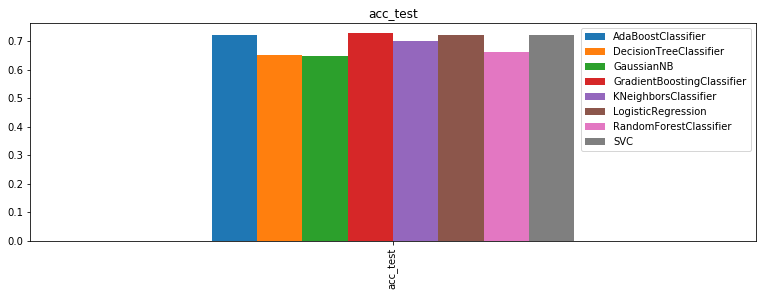

In [178]:
df_results[:1].plot.bar(figsize=(13, 4), title='acc_test')

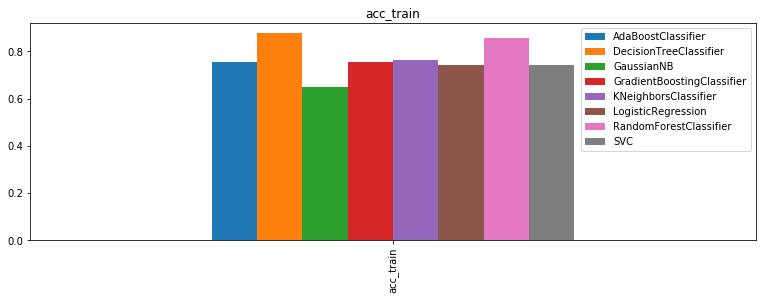

In [185]:
df_results[1:2].plot.bar(figsize=(13, 4), title='acc_train')

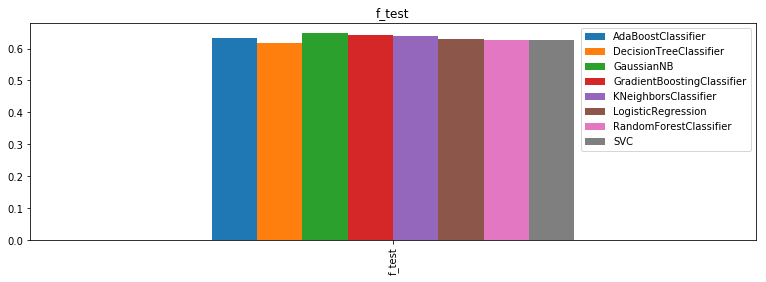

In [186]:
df_results[2:3].plot.bar(figsize=(13, 4), title='f_test')

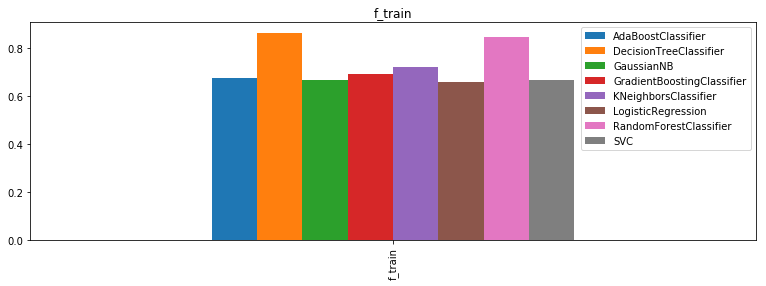

In [187]:
df_results[3:4].plot.bar(figsize=(13, 4), title='f_train')

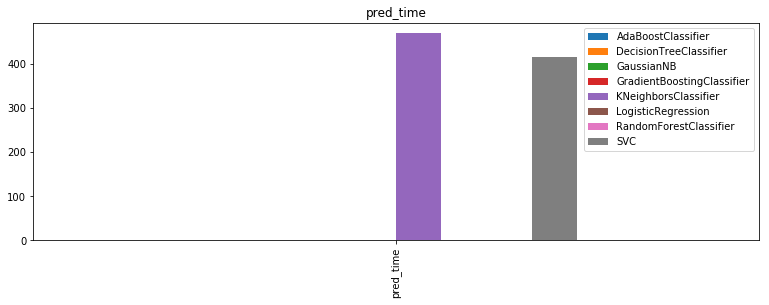

In [188]:
df_results[4:5].plot.bar(figsize=(13, 4), title='pred_time')

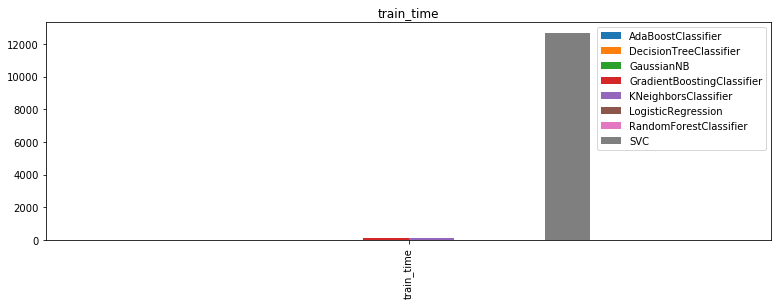

In [189]:
df_results[5:6].plot.bar(figsize=(13, 4), title='train_time')

### Algo Testing Conclusion

AdaBoostClassifier and GradientBoostingClassifier have highest test set accuracies and attractive training times.  I'll use these two to tune hyperparameters.